In [3]:
import keras
from PIL import Image
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from keras.utils import to_categorical

In [4]:
image1 = [None] * 103
label1 = [None] * 103
image2 = [None] * 103
label2 = [None] * 103
#创建数据集列表
data_amount = 0

n = 0

#insulting
for i in range(1,100):
    #
    data_place_one = './data_training_20240213/insulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image1[i-1] = np.array(img_2)
        label1[i-1] = 1
    else:
        pass
        #print("Failed to load image. or not exist")

#uninsulting
for i in range(1,100):
    data_place_one = './data_training_20240213/uninsulting/' + str(i) + '.jpg'
    #print(data_place_one)
    img_2 = cv2.imread(data_place_one)
    if img_2 is not None:
        n += 1
        data_amount += 1
        image2[i-1] = np.array(img_2)
        label2[i-1] = 0
    else:
        pass
        #print("Failed to load image. or not exist")
#print(img)

label = label1+label2
image = image1+image2

#删除空值
label = [x for x in label if x != None]
image = [x for x in image if np.any(x)]

test_image = image[80:120]
test_label = label[80:120]
image = image[:80]+image[120:]
label = label[:80]+label[120:]


In [5]:
label = np.array(label)
image = np.array(image)
test_label = np.array(test_label)
test_image = np.array(test_image)
#print(train_label.shape)

In [6]:
# 将标签数据进行one-hot编码
label_encoded = to_categorical(label, num_classes=2)
# 将标签数据进行one-hot编码
test_label_encoded = to_categorical(test_label, num_classes=2)

In [12]:
model = keras.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)), 
    layers.Dense(2048,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(2,activation="sigmoid")
])
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [13]:
epochs_ = 100
history = model.fit(image,
        label_encoded,
        epochs=epochs_,
        batch_size=100,
        validation_data=(test_image,test_label_encoded)
        )

Epoch 1/100
2/2 [==============================] - 1s 566ms/step - loss: 18191.5293 - accuracy: 0.5253 - val_loss: 53602.8750 - val_accuracy: 0.4750
Epoch 2/100
2/2 [==============================] - 1s 449ms/step - loss: 43024.2500 - accuracy: 0.5063 - val_loss: 14114.8066 - val_accuracy: 0.4750
Epoch 3/100
2/2 [==============================] - 1s 446ms/step - loss: 15324.8809 - accuracy: 0.5063 - val_loss: 7464.7720 - val_accuracy: 0.4750
Epoch 4/100
2/2 [==============================] - 1s 450ms/step - loss: 7261.9961 - accuracy: 0.5063 - val_loss: 2065.6953 - val_accuracy: 0.4750
Epoch 5/100
2/2 [==============================] - 1s 448ms/step - loss: 5978.3442 - accuracy: 0.5063 - val_loss: 2389.6445 - val_accuracy: 0.4750
Epoch 6/100
2/2 [==============================] - 1s 504ms/step - loss: 3267.0669 - accuracy: 0.5443 - val_loss: 2683.2915 - val_accuracy: 0.3250
Epoch 7/100
2/2 [==============================] - 1s 482ms/step - loss: 3456.3579 - accuracy: 0.6392 - val_loss:

In [7]:
model.evaluate(test_image,test_label_encoded)
y = np.argmax(model.predict(test_image[:]),axis=1)
print('原始：',y)
print('结果：',test_label)

2/2 [==============================] - 0s 0s/step
原始： [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
结果： [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


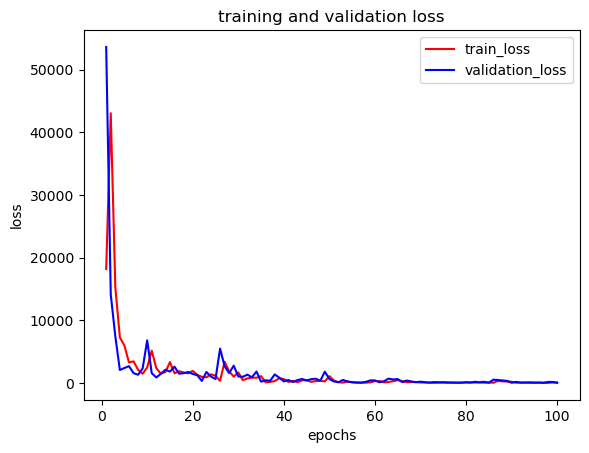

In [14]:
history_dir = history.history
print(history_dir.keys())
loss_values = history_dir["loss"]
accuracy_values = history_dir["accuracy"]
val_loss_values = history_dir["val_loss"]
val_accuracy_values = history_dir["val_accuracy"]
x_epochs = range(1,epochs_+1)
plt.plot(x_epochs,loss_values,"r",label = "train_loss")
plt.plot(x_epochs,val_loss_values,"b",label = "validation_loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

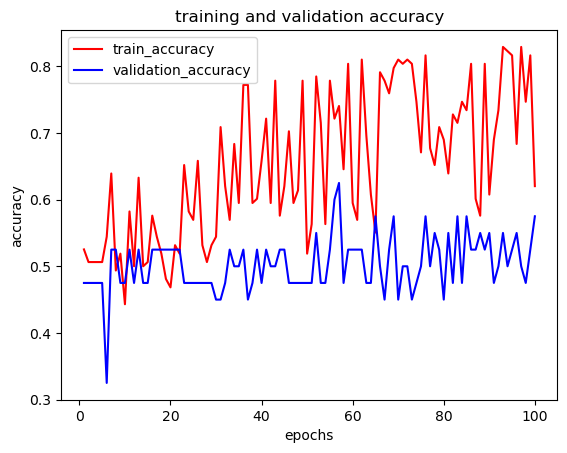

In [15]:
plt.plot(x_epochs,accuracy_values,"r",label = "train_accuracy")
plt.plot(x_epochs,val_accuracy_values,"b",label = "validation_accuracy")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()